Dataset size 50k: F1_target=0.3784, F1_macro=0.6855
Dataset size 100k: F1_target=0.3596, F1_macro=0.6757
Dataset size 200k: F1_target=0.3214, F1_macro=0.6569
Dataset size 400k: F1_target=0.4177, F1_macro=0.7059


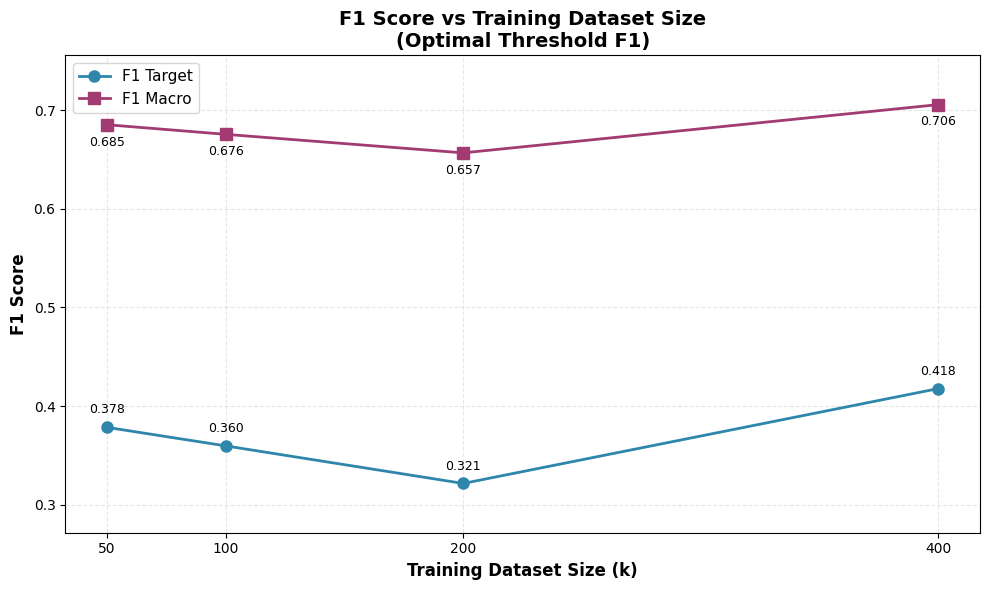


Summary:
----------------------------------------
Dataset 50k: F1_target=0.3784, F1_macro=0.6855
Dataset 100k: F1_target=0.3596, F1_macro=0.6757
Dataset 200k: F1_target=0.3214, F1_macro=0.6569
Dataset 400k: F1_target=0.4177, F1_macro=0.7059

F1 Target improvement: 0.0393
F1 Macro improvement: 0.0204


In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Complete the finetuned_paths dictionary
finetuned_paths = {
    "50": "/Users/Nora_Hallqvist/Code/qb-fm-labs-research/projects/tabformer/results/metrics/50k_embedding_input_fraud_predicition.json",
    "100": "/Users/Nora_Hallqvist/Code/qb-fm-labs-research/projects/tabformer/results/metrics/100k_embedding_input_fraud_prediction.json", 
    "200": "/Users/Nora_Hallqvist/Code/qb-fm-labs-research/projects/tabformer/results/metrics/200k_embedding_input_fraud_prediction.json", 
    "400": "/Users/Nora_Hallqvist/Code/qb-fm-labs-research/projects/tabformer/results/metrics/400k_raw_input_fraud_prediction.json" 
}

# Initialize lists to store data
dataset_sizes = []
f1_target_scores = []
f1_macro_scores = []

# Extract data from JSON files
for size_key, file_path in finetuned_paths.items():
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Convert size to integer for proper plotting
        dataset_size = int(size_key)
        dataset_sizes.append(dataset_size)
        
        # Extract F1 scores for optimal threshold F1
        # Assuming the structure has "Optimal thr F1" section
        optimal_f1_section = data.get("Results optimal F1", {})
        
        f1_target = optimal_f1_section.get("f1_target", 0)
        f1_macro = optimal_f1_section.get("f1_macro", 0)
        
        f1_target_scores.append(f1_target)
        f1_macro_scores.append(f1_macro)
        
        print(f"Dataset size {size_key}k: F1_target={f1_target:.4f}, F1_macro={f1_macro:.4f}")
        
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except json.JSONDecodeError:
        print(f"Error parsing JSON file: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Sort data by dataset size to ensure proper line plotting
sorted_data = sorted(zip(dataset_sizes, f1_target_scores, f1_macro_scores))
dataset_sizes, f1_target_scores, f1_macro_scores = zip(*sorted_data)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot both F1 scores
plt.plot(dataset_sizes, f1_target_scores, marker='o', linewidth=2, markersize=8, 
         label='F1 Target', color='#2E86AB')
plt.plot(dataset_sizes, f1_macro_scores, marker='s', linewidth=2, markersize=8, 
         label='F1 Macro', color='#A23B72')

# Customize the plot
plt.xlabel('Training Dataset Size (k)', fontsize=12, fontweight='bold')
plt.ylabel('F1 Score', fontsize=12, fontweight='bold')
plt.title('F1 Score vs Training Dataset Size\n(Optimal Threshold F1)', fontsize=14, fontweight='bold')

# Set x-axis to show the dataset sizes
plt.xticks(dataset_sizes)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Add legend
plt.legend(fontsize=11)

# Set y-axis limits to better show the data range
if f1_target_scores and f1_macro_scores:
    all_scores = list(f1_target_scores) + list(f1_macro_scores)
    y_min = max(0, min(all_scores) - 0.05)
    y_max = min(1, max(all_scores) + 0.05)
    plt.ylim(y_min, y_max)

# Add value annotations on the points
for i, (x, y1, y2) in enumerate(zip(dataset_sizes, f1_target_scores, f1_macro_scores)):
    plt.annotate(f'{y1:.3f}', (x, y1), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)
    plt.annotate(f'{y2:.3f}', (x, y2), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=9)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print("\nSummary:")
print("-" * 40)
for size, target, macro in zip(dataset_sizes, f1_target_scores, f1_macro_scores):
    print(f"Dataset {size}k: F1_target={target:.4f}, F1_macro={macro:.4f}")
    
if len(dataset_sizes) > 1:
    print(f"\nF1 Target improvement: {f1_target_scores[-1] - f1_target_scores[0]:.4f}")
    print(f"F1 Macro improvement: {f1_macro_scores[-1] - f1_macro_scores[0]:.4f}")